In [65]:
# -*- coding: utf-8 -*-

# CNN(합성곱신경망)

# 사전준비

In [1]:
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 라이브러리 불러오기

In [2]:
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)
#print(keras.__version__)

2.4.1


## 하이퍼 파라미터 설정

In [3]:
learning_rate = 0.001
training_epochs = 2
batch_size = 100
n_class = 10

## MNIST 또는 패션 MNIST 데이터 선택

In [4]:
# ## MNIST Dataset 
# mnist = tf.keras.datasets.mnist
# class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


# Fashion MNIST Dataset 
mnist = tf.keras.datasets.fashion_mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Datasets

In [5]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()  

4423680/4422102 [==============================] - 0s 0us/step


In [11]:
N_TRAIN = train_images.shape[0]
N_TEST = test_images.shape[0]

In [12]:
train_images.shape

(60000, 28, 28, 1)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
# pixel값을 0~1사이 범위로 조정
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

# CNN에 입력으로 넣기 위해 3차원->4차원으로 변경(channel에 1을 추가)
# 샘플 , W , H ,Channel 4차원을 입력 값으로 받는단 
train_images = train_images[..., tf.newaxis]
test_images = test_images[..., tf.newaxis]

# label을 onehot-encoding
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [10]:
train_images.shape

(60000, 28, 28, 1)

In [11]:
test_labels[:3]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# 순차형 API (Sequential API)

## 모델 구축

In [16]:
#model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

## 연습 1: CNN 기본 모델 만들기

In [21]:
# 순차형 API를 사용해 위의 모델을 구축하라.
# 힌트:
# Conv2D -> MaxPool2D를 세번 반복하고, Fatten -> Dense -> Dropout -> Dense로 완성하라. 
# kersnel_size는 3, activation='relu', padding='SAMME', filter는 32, 64, 128 사용하고, Dense에서는 출력 유닛을 256, 10을 사용하라.

def create_model():

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', 
                                  input_shape=(28, 28, 1)))
    #kernel_size는 정사각형이기 떄문에 ㄱㅊ 28-3+2 -> 근데 패딩을 same으로 줘서 차원이 안줄어들게 해줌
    # 첫번째 Con이 어떻게 이루어지는가?에 대해서 생각을 해보면 된다. 
    #ppt 참고 
    #28 * 28 * 32로 아웃풋을 주고 싶음 
    
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    #정확하게 반으로 나눠줌
    
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    
    
    ##############################컨벌루젼 끝 ############### 4 * 4 * 128 까지옴 )
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

In [23]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)             

## 연습 2 모델 컴파일

In [24]:
## 모델 컴파일
# Adam, cross endtropy와 accuracy를 사용해 완성하라.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), 
                 loss='categorical_crossentropy', #sparse_crossentropy -> 연속형자료
                 metrics=['accuracy']            
                )

# 연습3: 학습

In [25]:
## 학습
# 힌트 훈련셋, 에폭, 배치크기, 검증셋을 지정하라.
model.fit(train_images, train_labels, epochs=training_epochs, batch_size=batch_size, validation_data=(test_images, test_labels))

Epoch 1/2
600/600 [==============================] - 86s 142ms/step - loss: 0.7620 - accuracy: 0.7200 - val_loss: 0.3456 - val_accuracy: 0.8695
Epoch 2/2
600/600 [==============================] - 84s 140ms/step - loss: 0.3210 - accuracy: 0.8832 - val_loss: 0.2890 - val_accuracy: 0.8946


# tf.data.Dataset로 데이터셋 만들기

## 연습 4: 데이터셋 만들기

In [28]:
## dataset 만들기
# tf.data.Dataset의 from_tensor_slices를 이용해서 다음 데이터셋을 만들어보라
train_dataset=tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(buffer_size=100000).batch(batch_size).repeat()
#훈련에 더 맞춰서 shuffle도 해주고 batch 처리, repeat을 해줌 
test_dataset =tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size) 

In [29]:
steps_per_epoch =N_TRAIN//batch_size  #model.fit()에서 사용한다.
validation_steps = N_TEST//batch_size

In [30]:
## 다시 모델 생성
model = create_model()

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

## 연습 5 모델 컴파일

In [32]:
## 모델 컴파일
# Adam, cross endtropy와 accuracy를 사용해 완성하라.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate), 
                 loss='categorical_crossentropy', 
                 metrics=['accuracy']            
                )

## 연습 6: 학습 전 결과 확인하라.

In [33]:
## 학습 전에 결과 확인 다음을 완성하라.
model.evaluate(test_dataset, steps=validation_steps)

100/100 [==============================] - 3s 32ms/step - loss: 2.3122 - accuracy: 0.0987


[2.311500072479248, 0.10000000149011612]

In [34]:
steps_per_epoch = N_TRAIN//batch_size
validation_steps = N_TEST//batch_size
print('number of steps per epoch: ', steps_per_epoch)
print('number of steps per validation: ', validation_steps)

number of steps per epoch:  600
number of steps per validation:  100


## 연습 7: 모델 적합화

In [35]:
## 학습을 tf.data.Dataset으로 생성한 데이터셋을 이용해서 적합화를 시도하라.
history= model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
          validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/2
600/600 [==============================] - 77s 128ms/step - loss: 0.5396 - accuracy: 0.8024 - val_loss: 0.3465 - val_accuracy: 0.8721
Epoch 2/2
600/600 [==============================] - 68s 114ms/step - loss: 0.3277 - accuracy: 0.8819 - val_loss: 0.2957 - val_accuracy: 0.8908


In [36]:
## 결과 확인
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[:,:,0],cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    #plt.xticks([])
    plt.xticks(range(n_class), class_names, rotation=90)
    plt.yticks([])
    thisplot = plt.bar(range(n_class), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

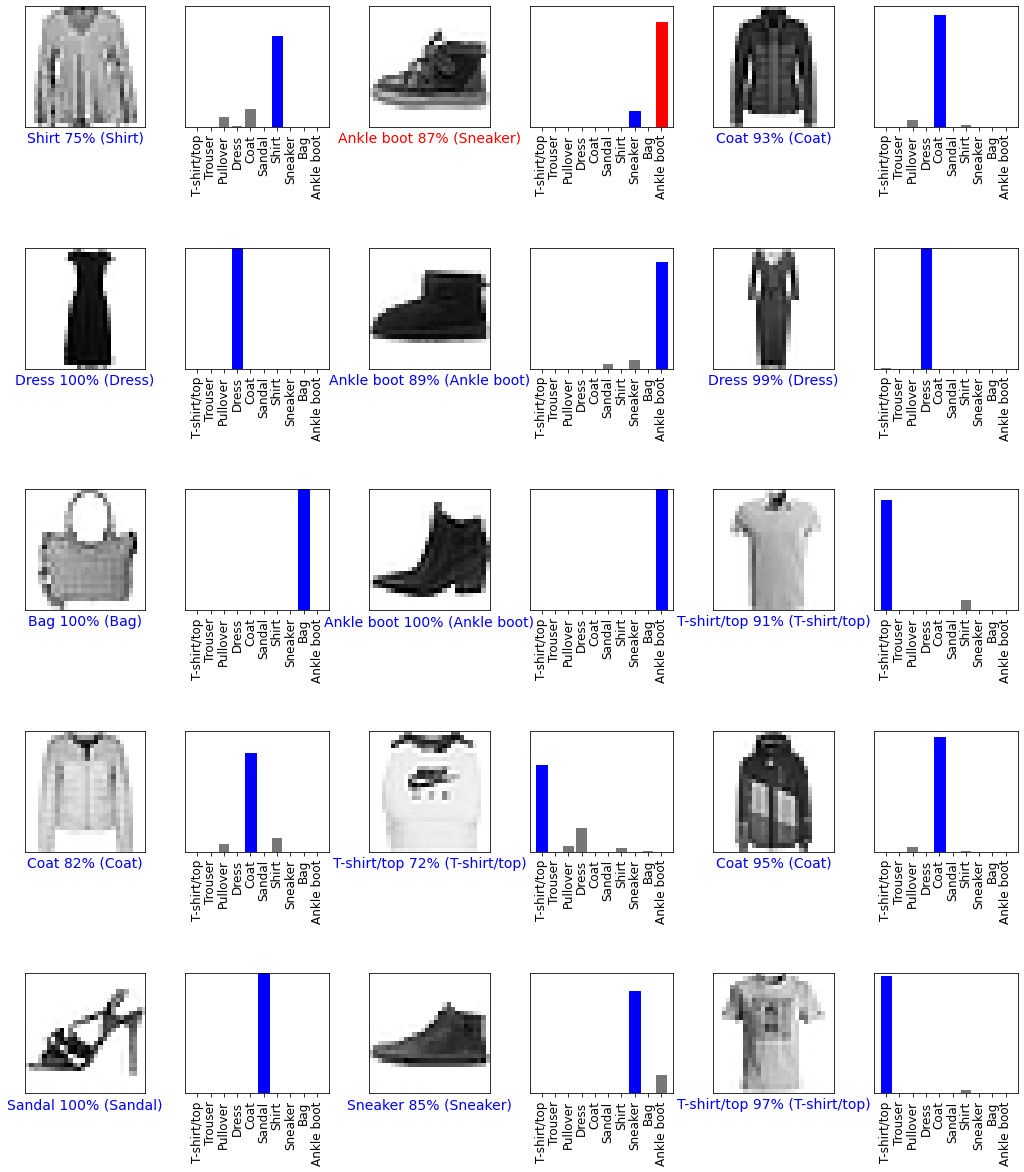

In [40]:
rnd_idx = np.random.randint(1, N_TEST//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# 체크포인트 디레토리와 경로 작성 

In [58]:
cur_dir = os.getcwd()
ckpt_dir_name = 'checkpoints'
model_dir_name = 'mnist_cnn_keras'
ckpt_name = 'mnist_cnn_keras.ckpt'

checkpoint_dir = os.path.join(cur_dir, ckpt_dir_name, model_dir_name)
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_path = os.path.join(checkpoint_dir, ckpt_name)

In [59]:
checkpoint_path

'C:\\Users\\minisong\\practice\\텐서플로우 교육\\2일차 기초실습\\checkpoints\\mnist_cnn_keras\\mnist_cnn_keras.ckpt'

# 가중치 저장

# 연습 8: 가중치 저장

In [60]:
model.save_weights(checkpoint_path)

In [61]:
!ls 'checkpoints/mnist_cnn_keras'

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


# 다시 모델 작성

In [62]:
new_model1 = create_model()
new_model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
new_model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2048)             

# 복원 이전 정확도 테스트

In [63]:
new_model1.evaluate(test_dataset)

100/100 [==============================] - 4s 33ms/step - loss: 2.3024 - accuracy: 0.1020


[2.3031883239746094, 0.10379999876022339]

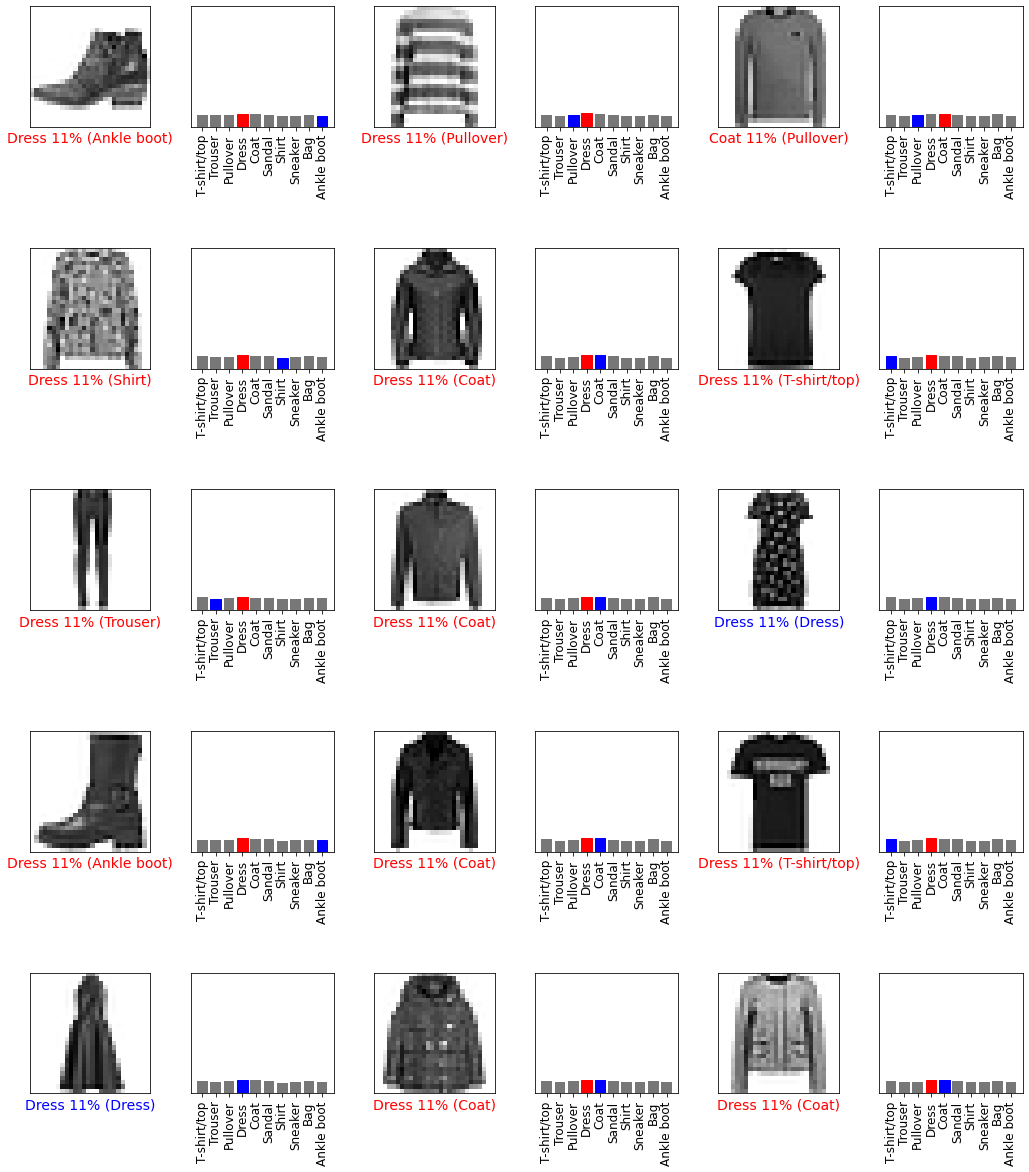

In [64]:
rnd_idx = np.random.randint(1, N_TEST//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model1(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# 가중치 복원

## 연습 9 가중치를 복원하라.

In [65]:
new_model1.load_weights(checkpoint_path)

In [66]:
# 복원 후 정확도 테스트

In [67]:
new_model1.evaluate(test_dataset)

100/100 [==============================] - 4s 36ms/step - loss: 0.3849 - accuracy: 0.8576


[0.3848678767681122, 0.8575999736785889]

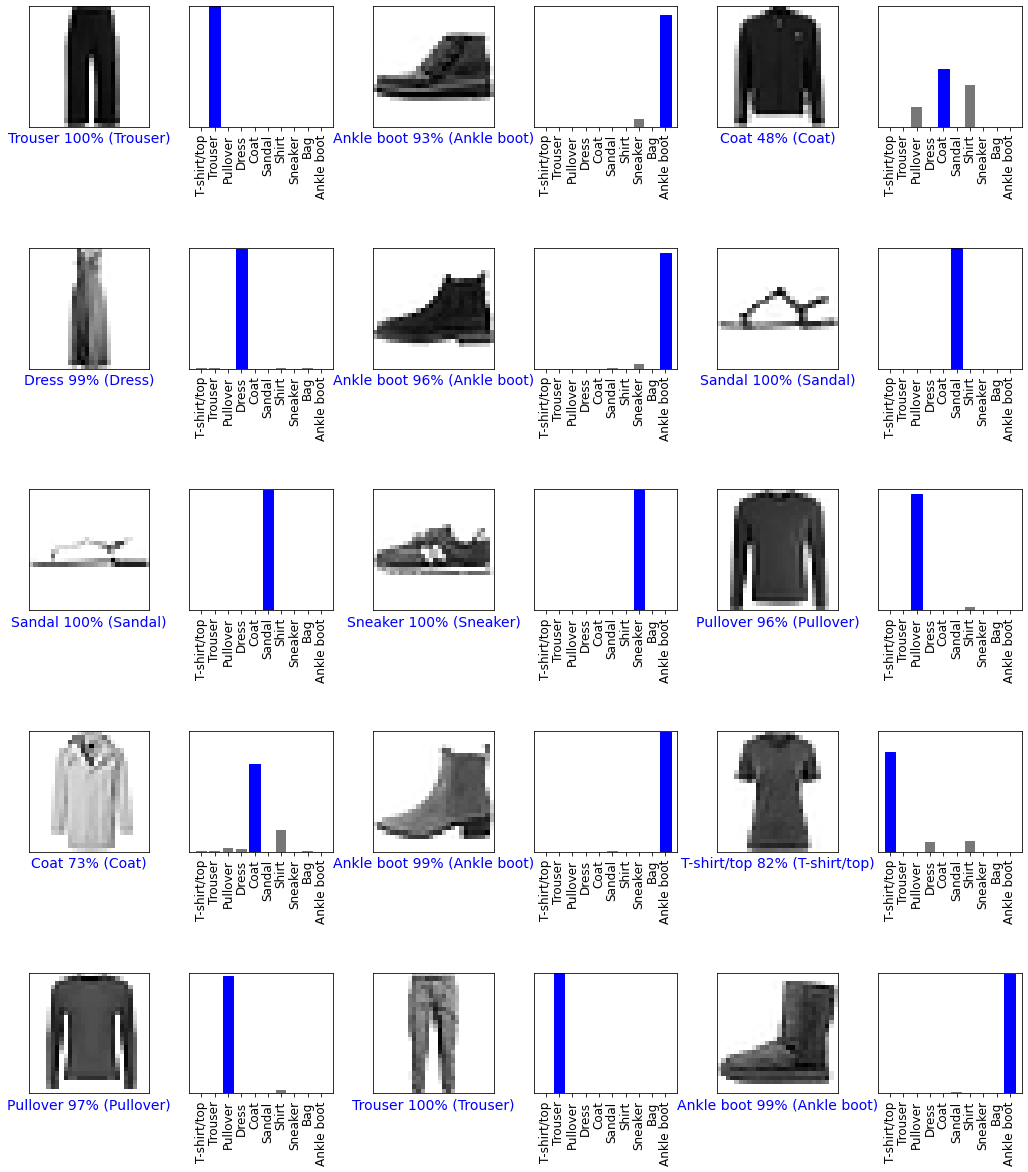

In [68]:
rnd_idx = np.random.randint(1, N_TEST//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = new_model1(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())        
    break

# Callback 사용하여 저장하기

In [71]:
## 새로운 model 생성
model = create_model()

## model compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 2048)             

In [72]:
## 학습 전에 결과 확인
model.evaluate(test_images, test_labels)

313/313 [==============================] - 4s 12ms/step - loss: 2.3086 - accuracy: 0.1291


[2.3080384731292725, 0.13040000200271606]

In [73]:
ckpt_name = 'mnist_cnn_{epoch:04d}.ckpt'
checkpoint_path = os.path.join(checkpoint_dir, ckpt_name)

# callback 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                              save_weights_only=True)

## Training
history = model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps,
                    callbacks=[cp_callback])

Epoch 1/2
600/600 [==============================] - 83s 137ms/step - loss: 0.5324 - accuracy: 0.8037 - val_loss: 0.3466 - val_accuracy: 0.8736
Epoch 2/2
600/600 [==============================] - 87s 145ms/step - loss: 0.3229 - accuracy: 0.8834 - val_loss: 0.2959 - val_accuracy: 0.8915


In [74]:
!ls 'checkpoints/mnist_cnn_keras'

'ls'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [75]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'C:\\Users\\minisong\\practice\\텐서플로우 교육\\2일차 기초실습\\checkpoints\\mnist_cnn_keras\\mnist_cnn_0002.ckpt'

In [76]:
# 새로운 모델 인스턴스화 
new_model2 = create_model()
new_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
# 가중치 로딩 이전
new_model2.evaluate(test_dataset)

# 사전 저장된 가중치 로딩
new_model2.load_weights(latest)

# 모델 재평가
new_model2.evaluate(test_dataset)

100/100 [==============================] - 4s 35ms/step - loss: 0.2959 - accuracy: 0.8915


[0.29589027166366577, 0.8914999961853027]

In [77]:
## 다시 Training
history =new_model2.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps,
                    callbacks=[cp_callback])

Epoch 1/2
600/600 [==============================] - 86s 142ms/step - loss: 0.2727 - accuracy: 0.8997 - val_loss: 0.2608 - val_accuracy: 0.9028
Epoch 2/2
600/600 [==============================] - 86s 143ms/step - loss: 0.2372 - accuracy: 0.9129 - val_loss: 0.2520 - val_accuracy: 0.9063


In [78]:
## 또 다시 Training
history =new_model2.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps,
                    callbacks=[cp_callback])

Epoch 1/2
600/600 [==============================] - 87s 145ms/step - loss: 0.2158 - accuracy: 0.9208 - val_loss: 0.2387 - val_accuracy: 0.9118
Epoch 2/2
219/600 [=========>....................] - ETA: 57s - loss: 0.1996 - accuracy: 0.9269

KeyboardInterrupt: 

In [ ]:
new_model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
## 또 다시 Training
history =new_model2.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
                    validation_data=test_dataset, validation_steps=validation_steps,
                    callbacks=[cp_callback])

# 전체 모델 저장

## HDF5 format으로 전체 model 저장하기

In [ ]:
save_dir_name = 'saved_models'
os.makedirs(save_dir_name, exist_ok=True)
hdf5_model_path = os.path.join(cur_dir, save_dir_name, 'my_model.h5')
hdf5_model_path

In [ ]:
model.save(hdf5_model_path)

In [ ]:
!ls saved_models

## 동일한 모델 재작성

In [ ]:
new_model3 = tf.keras.models.load_model(hdf5_model_path)

In [ ]:
new_model3.summary()

In [ ]:
new_model3.evaluate(test_dataset)

## saved_model format으로 저장하기(.pb)

In [ ]:
saved_model_path = os.path.join(cur_dir, save_dir_name, 'my_model')

In [ ]:
model.save(saved_model_path)

In [ ]:
!ls saved_models/my_model

## 동일한 모델 재작성

In [ ]:
new_model4 = tf.keras.models.load_model(saved_model_path)

In [ ]:
new_model4.evaluate(test_dataset)

In [ ]:
#############################################################################################################################

# 함수형 API(Fuctional API) 이용하기

In [ ]:
# 순차형 (Sequential API)
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='SAME', input_shape=(28,28,1)))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='SAME'))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='SAME'))
    model.add(tf.keras.layers.MaxPool2D(padding='SAME'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    return model

## 연습 10 함수형 API를 사용해 모델 구축하라.

In [79]:
# 위의 모델을 함수형 API를 사용하여 다음을 완성하라.
def create_model():
    inputs = tf.keras.Input(shape=(28, 28, 1))
    conv1 =tf.keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', padding='SAME') (inputs)
    pool1 =tf.keras.layers.MaxPool2D(padding='SAME') (conv1)
    conv2 =tf.keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu', padding='SAME') (pool1)
    pool2 =tf.keras.layers.MaxPool2D(padding='SAME') (conv2)
    conv3 =tf.keras.layers.Conv2D(filters=128, kernel_size=[3,3], activation='relu', padding='SAME') (pool2)
    pool3 =tf.keras.layers.MaxPool2D(padding='SAME') (conv3)
    pool3_flat = tf.keras.layers.Flatten()(pool3)
    dense4 =tf.keras.layers.Dense(units=256, activation='relu') (pool3_flat)
    drop4 =tf.keras.layers.Dropout(rate=0.4)(dense4)
    logits =tf.keras.layers.Dense(units=10, activation='softmax')(drop4)
    return tf.keras.Model(inputs=inputs, outputs=logits)

In [80]:
model = create_model()

In [81]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 4, 4, 128)         0     

In [82]:
## 모델 컴파일
# Adam, cross endtropy와 accuracy를 사용해 완성하라.
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [83]:
## 학습전 정확도 확인
model.evaluate(test_dataset)

100/100 [==============================] - 4s 34ms/step - loss: 2.3063 - accuracy: 0.0817


[2.306185245513916, 0.08579999953508377]

In [84]:
## 학습
# 힌트 훈련셋, 에폭, 배치크기, 검증셋와 훈련과 검증 스텝수를 지정하라.
## 학습을 tf.data.Dataset으로 생성한 데이터셋을 이용해서 적합화를 시도하라.
history= model.fit(train_dataset, epochs=training_epochs, steps_per_epoch=steps_per_epoch, 
          validation_data=test_dataset, validation_steps=validation_steps)

Epoch 1/2
600/600 [==============================] - 91s 150ms/step - loss: 0.5121 - accuracy: 0.8149 - val_loss: 0.3352 - val_accuracy: 0.8777
Epoch 2/2
600/600 [==============================] - 91s 152ms/step - loss: 0.3087 - accuracy: 0.8883 - val_loss: 0.3059 - val_accuracy: 0.8922


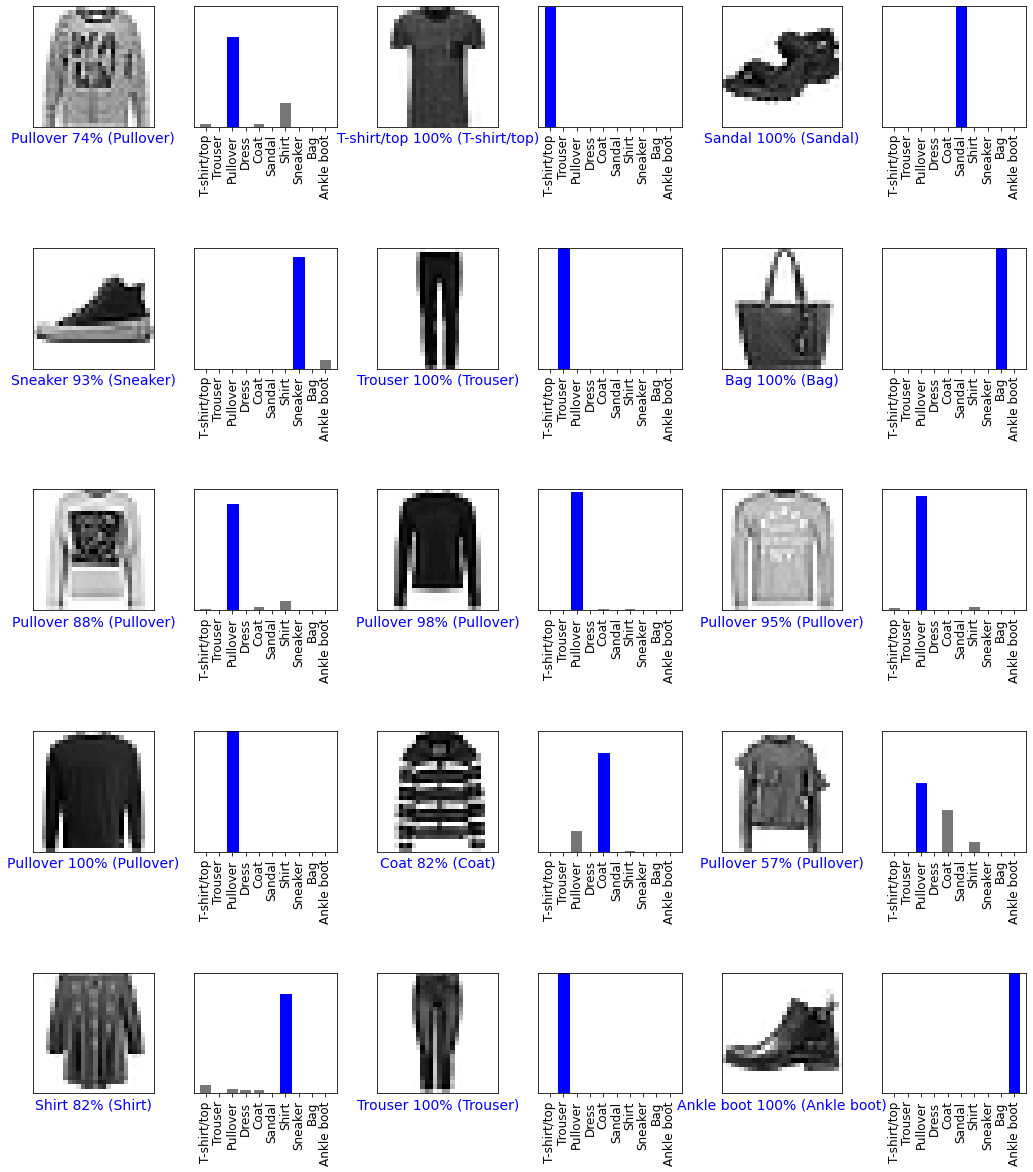

In [73]:
rnd_idx = np.random.randint(1, N_TEST//batch_size)
img_cnt = 0
for images, labels in test_dataset:
    img_cnt += 1
    if img_cnt != rnd_idx:
        continue
    predictions = model(images, training=False)
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    labels = tf.argmax(labels, axis=-1)
    plt.figure(figsize=(3*2*num_cols, 4*num_rows))
    plt.subplots_adjust(hspace=1.0)
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image(i, predictions.numpy(), labels.numpy(), images.numpy())
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array(i, predictions.numpy(), labels.numpy())

### HDF5 format으로 전체 model 저장하기

## 연습 11. 저장 경로를 지정하라

In [93]:
# 모델을 저장할 경로를 지정한다. (save_dir_name = 'saved_models'로 지정했다는 것을 기억하라)
saved_model_path = os.path.join(cur_dir, save_dir_name, 'mnist_cnn_func.h5')

## 연습12. 모델을 저장하라.

In [94]:
# 모델을 저장한다.


In [95]:
# 제대돌 저장됐는지 확인


mnist_cnn_func.h5
my_model
my_model.h5


## 연습 13. 모델 로딩해서 평가

In [96]:
# 모델을 로딩해서 테스트셋(test_dataset)에서 평가한다.


100/100 [==============================] - 3s 33ms/step - loss: 0.2757 - accuracy: 0.8998


[0.2756688594818115, 0.8998000025749207]

### 다른 방법으로 모델을 저장 (saved_model format으로 저장하기(.pb))

## 연습 14. 모델 경로 지정, 저장하고 확인

In [97]:
# 모델 경로를 정해 저장하고 확인 


INFO:tensorflow:Assets written to: C:\Users\USER\20. 패스트캠퍼스_한국기술\2일차\2일차_실습자료\saved_models\mnist_cnn_func_pb\assets
total 176
drwxr-xr-x 1 USER �뾾�쓬      0 Dec  9 11:34 assets
-rw-r--r-- 1 USER �뾾�쓬 173087 Dec  9 11:34 saved_model.pb
drwxr-xr-x 1 USER �뾾�쓬      0 Dec  9 11:34 variables


## 연습 15. 모델 불러서 test_dataset에서 평가

In [98]:
# 다시 모델 불러서 test_dataset에서 평가한다.



100/100 [==============================] - 4s 35ms/step - loss: 0.2757 - accuracy: 0.8998


[0.2756688594818115, 0.8998000025749207]

In [99]:
# -*- coding: utf-8 -*-